#### Outline.
            1. Understanding Unigram, Bigrams, Trigrams & N-grams.
            
            2. Using N-grams in pre-processing text_dataset.
            

## 1. Understanding `Unigram, Bigrams, Trigrams` & `N-grams`.


### 1.1. Definition.
In the fields of `computational linguistics` and `probability`, an `n-gram` is a contiguous sequence of **`n items`** from a `given sample of text or speech`. The *items can be phonemes, syllables, letters, **words** or base pairs according to the application*.

The `n-grams` typically are collected from a `text or speech corpus`. *When the items are words, `n-grams` may also be called `shingles`.*


### 1.2. Why using `N-gram` based on `probability` and its `intuitive formulation`?

In `NLP`, the `n-grams` are used for a variety of things; for instance:
- `auto completion of sentences` (such as the one we see in `Gmail`), 
- `auto spell check` (yes, we can do that as well), and to a certain extent, we can `check for grammar` in a given sentence. 

For example, in the sentence `“Thank you so much for your ”` and we ***expect the system to predict what the next word will be?***.  the next word is `“consideration”` with a very high probability. 
- But how will the system know that?
- One important thing to note here is that, as for any other `AI` or `ML` model, we need to train the model with a `huge corpus of data`. Once we do that, *the `NLP` model will have a pretty good idea of the* ***`“probability”`*** *of the* ***`occurrence of a word after a certain word`***. So hoping that we have trained our model with a huge corpus of data, we’ll assume that the model gave us the correct answer.
- Now, the `probability` $P(w | h)$ of a `word` $w$ given some `history (past)` $h$; and we have to find

$$ P\left( \text{consideration} \left| \text{ Thank you so much for your} \right. \right). $$

In a **`Bigrams model`**, this model approximates the probability of a word given all the `previous words` by using only the conditional probability of one preceding word. In other words, you approximate it with the probability:

$$ P \left( w_n \left| w_1^{n-1} \right. \right) = P \left( w_n \left| w_{n-1} \right. \right) = P \left( \text{consideration} \left| \text{ your} \right. \right) $$

In **`N-grams model`**, that is

$$ P \left( w_n \left| w_{N-1}^{n-1} \right. \right) = P \left( w_n \left| w_{n-1}, \ldots, w_{n-N+1} \right. \right) $$

#### HOW TO EVALUATE THE `MODEL`

One of the most straightforward and intuitive ways to do so is `Maximum Likelihood Estimation (MLE)`. We get the `MLE` estimate for the parameters of an n-gram model by getting counts from a corpus, and normalizing the counts so that they lie between 0 and 1.

For example, to compute a particular bigram probability of a word y given a `previous word x`, we’ll compute the count of the `bigram C(xy)` and normalize by the sum of `all the bigrams that share the same first word x`

$$ P\left(y\left|x\right.\right) = \dfrac{\text{count}\left(x,y\right)}{\text{count}\left(x\right)} $$

------------------------------------

What do we do with words that are in our vocabulary (they are not unknown words) but appear in a test set in an unseen context.

#### 1. LAPLACE SMOOTHING

`Laplace smoothing` merely adds one to each count (hence its alternate name add one smoothing). Since there are $V$ words in the vocabulary and each one was incremented, we also need to adjust the denominator to take into account the extra $V$
observations. 
$$ P_{\text{Laplace}}^{\text{bi-gram}} \left(y\left|x\right.\right) = \dfrac{1 + \text{count}\left(x,y\right)}{V + \text{count}\left(x\right)} $$


#### 2. Add-k smoothing
$$ P_{\text{k_smooth}}^{\text{bi-gram}} \left(y\left|x\right.\right) = \dfrac{k + \text{count}\left(x,y\right)}{kV + \text{count}\left(x\right)} $$

### 1.3. Generate `unigrams, bigrams, trigrams & n-grams`  in `Python`.

In [7]:
import itertools
from nltk import word_tokenize
from nltk import *

**`Unigrams`, `bigrams`, `trigrams` and `N-grams`**

By using these methods you will get the lists for each:

In [8]:
text = "The better day was yesterday"

uni_grams = word_tokenize(text)
bi_grams = list(bigrams(list(uni_grams)))
tri_grams = list(trigrams(list(uni_grams)))
four_grams =list(ngrams(uni_grams, 4))

print('uni-grams: \t', uni_grams)
print('bi-grams: \t', bi_grams)
print('tri-grams: \t', tri_grams)
print('4-grams: \t', four_grams)

uni-grams: ['The', 'better', 'day', 'was', 'yesterday']
bi-grams: [('The', 'better'), ('better', 'day'), ('day', 'was'), ('was', 'yesterday')]
tri-grams [('The', 'better', 'day'), ('better', 'day', 'was'), ('day', 'was', 'yesterday')]
4-grams [('The', 'better', 'day', 'was'), ('better', 'day', 'was', 'yesterday')]


**n-grams in a range** To generate `n-grams` for `m` to `n` order, use the method everygrams: Here `n=2` and `m=6`, it will generate `2-grams,3-grams,4-grams,5-grams` and `6-grams`.

In [9]:
two_to_6_grams = list(everygrams(uni_grams, 2, 6))
print('2_to_6_grams: \n', two_to_6_grams)

2_to_6_grams: 	 [('The', 'better'), ('better', 'day'), ('day', 'was'), ('was', 'yesterday'), ('The', 'better', 'day'), ('better', 'day', 'was'), ('day', 'was', 'yesterday'), ('The', 'better', 'day', 'was'), ('better', 'day', 'was', 'yesterday'), ('The', 'better', 'day', 'was', 'yesterday')]


## 2. Using `N-grams` in pre-processing the `text_dataset` in many applications

### Loading and viewing dataset

In [29]:
import pandas as pd

train_path = r"C:\Users\Admin\Desktop\Nhan_pro\Data\project_kaggle_data\NLP tweet\train.csv"
df_train = pd.read_csv(train_path)
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [30]:
print('Data_shape:', df_train.shape)
print(f'Number of unique values in keyword = {df_train["keyword"].nunique()} (Training)')
print(f'Number of unique values in location = {df_train["location"].nunique()} (Training)')

Data_shape: (7613, 5)
Number of unique values in keyword = 221 (Training)
Number of unique values in location = 3341 (Training)


### Text_processing

In [31]:
import re

#pip install spellchecker and pip install pyspellchecker
from spellchecker import SpellChecker
spell = SpellChecker()

def process_text(str_input):
    ## 1. Remove url_link
    remove_url = re.compile(r'https?://\S+|www\.\S+').sub(r'', str_input)
    
    ## 2. Remove html_link
    remove_html = re.compile(r'<.*?>').sub(r'', remove_url)
    
    ## 3. Remove Emojis
    remove_emo = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE).sub(r'', remove_html)
    words = re.sub(r"[^A-Za-z0-9\-]", " ", remove_emo).lower().split()    
        
    ## 4. spell_correction
    spell = SpellChecker()
    words = [spell.correction(word) for word in words]

    return words

df_train['text'] = df_train['text'].apply(process_text)
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[our, deeds, are, the, reason, of, this, earth...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[all, residents, asked, to, shelter, in, place...",1
3,6,NaN,NaN,"[13, 000, people, receive, wildfires, evacuati...",1
4,7,NaN,NaN,"[just, got, sent, this, photo, from, ruby, ala...",1


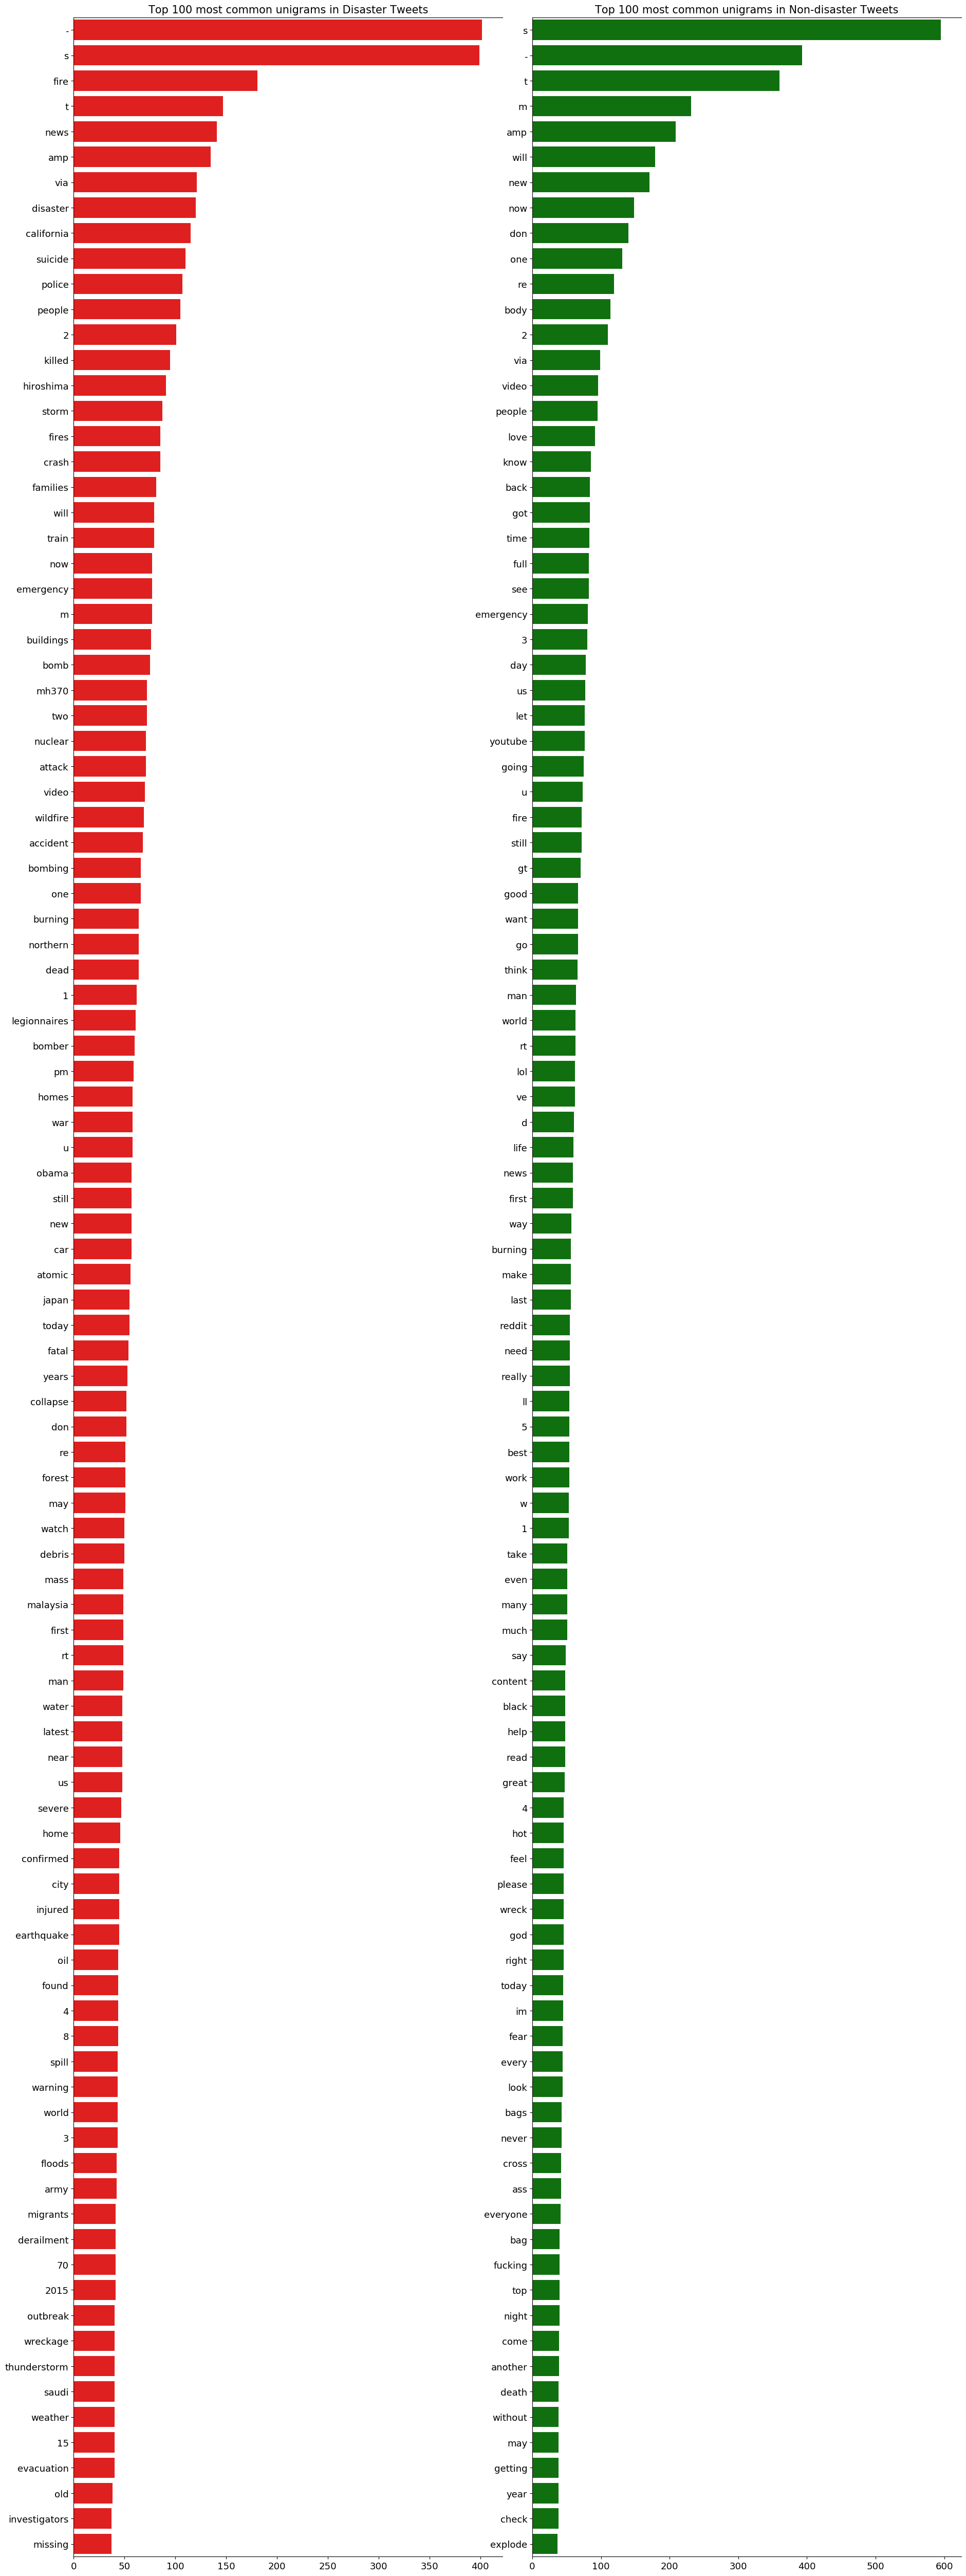

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

N = 100

DISASTER_TWEETS = df_train['target'] == 1

def generate_ngrams(text, n_gram=1):
    
    token = [token for token in text if token != '' if token not in STOPWORDS]
    
    ## if you don't apply the function process_text
    ## token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()

### Bigrams

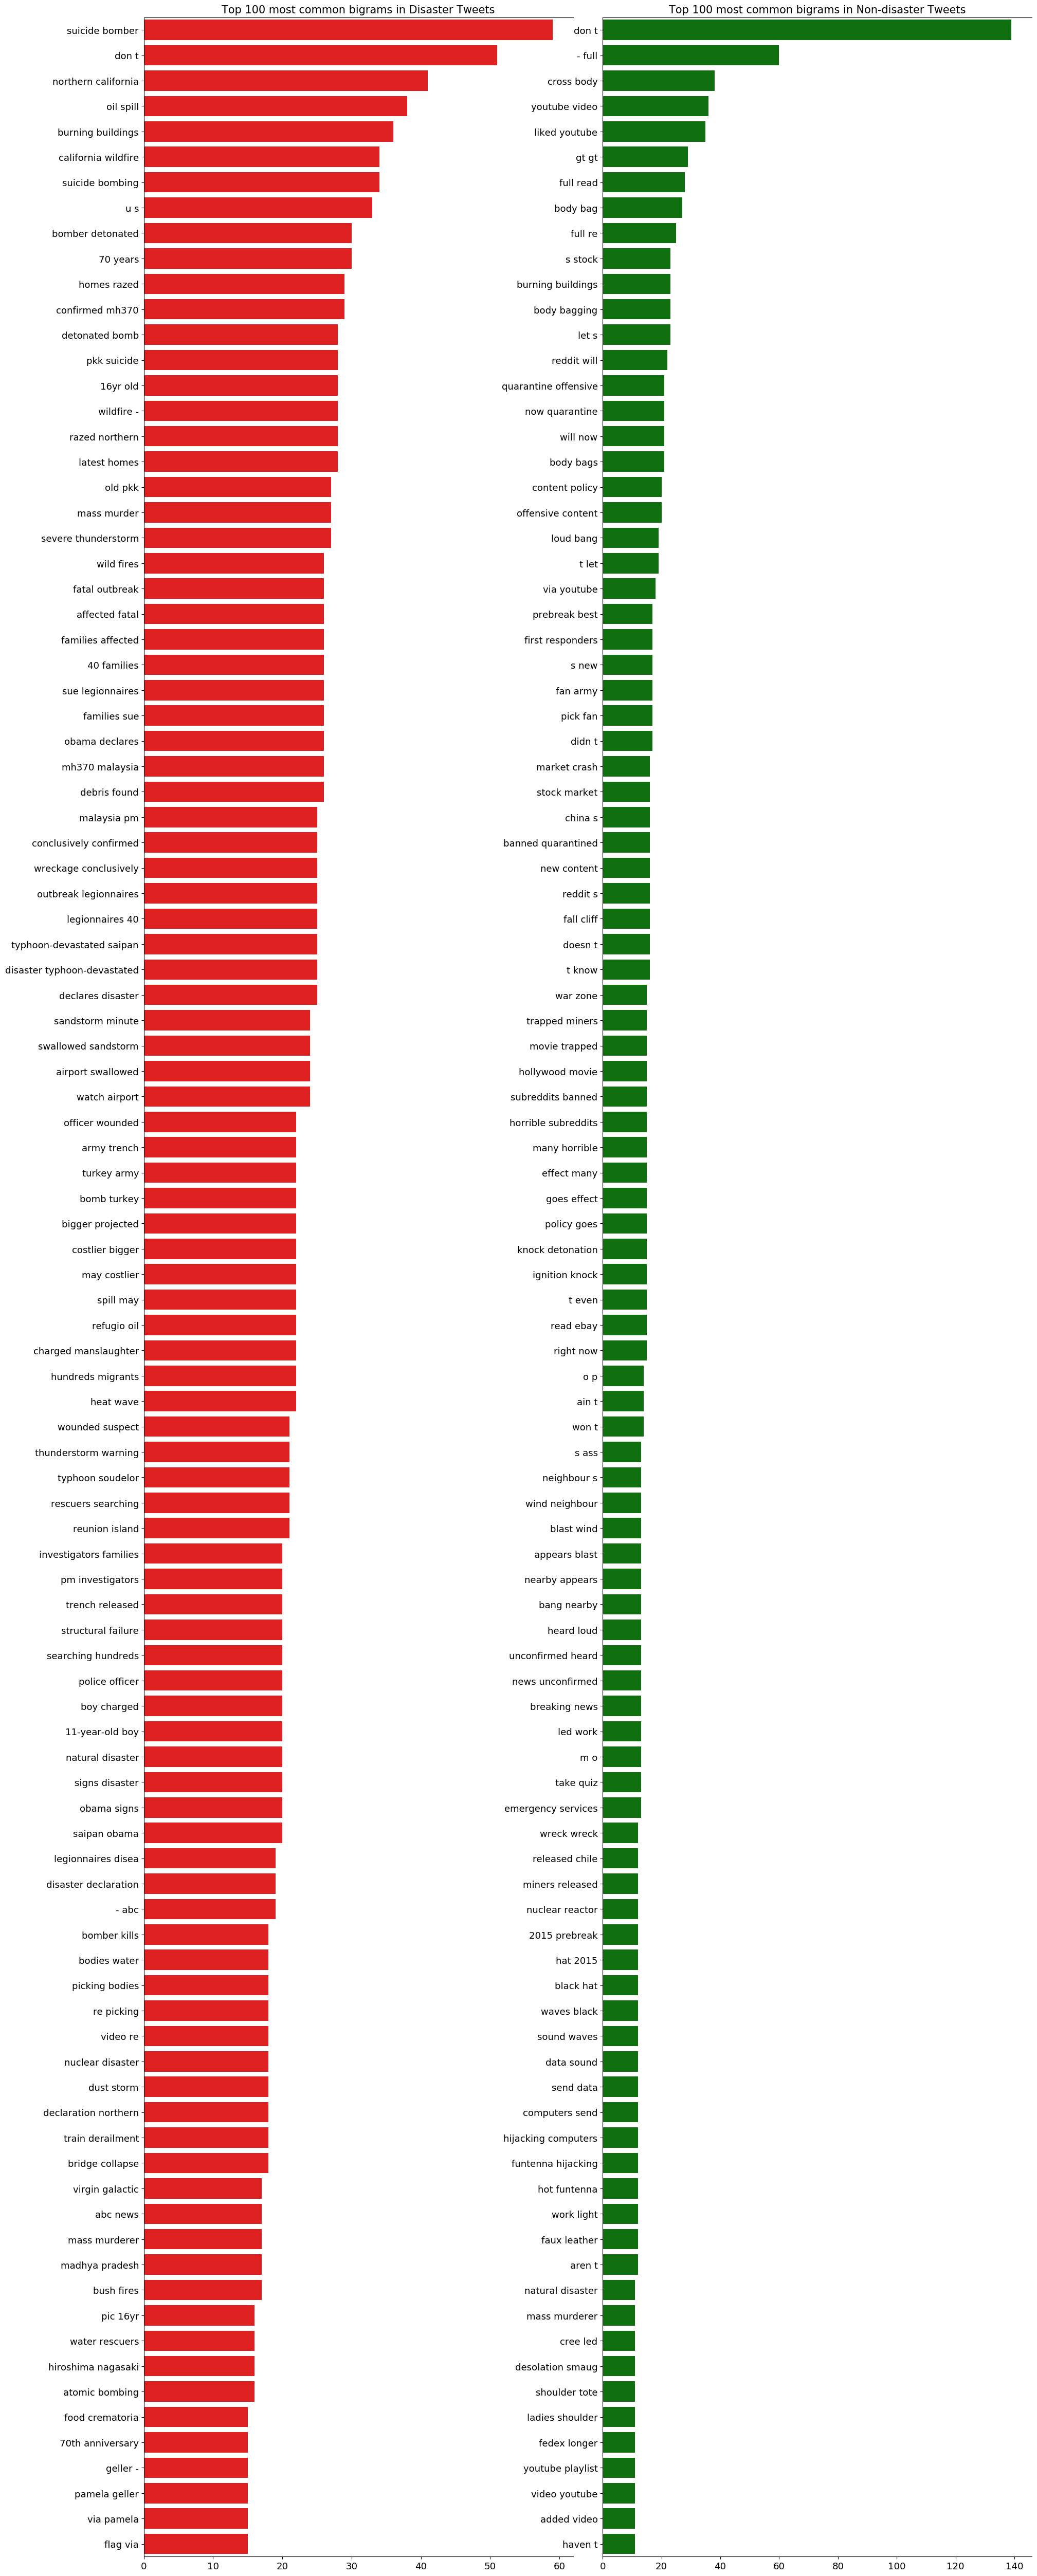

In [35]:
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

### Trigrams

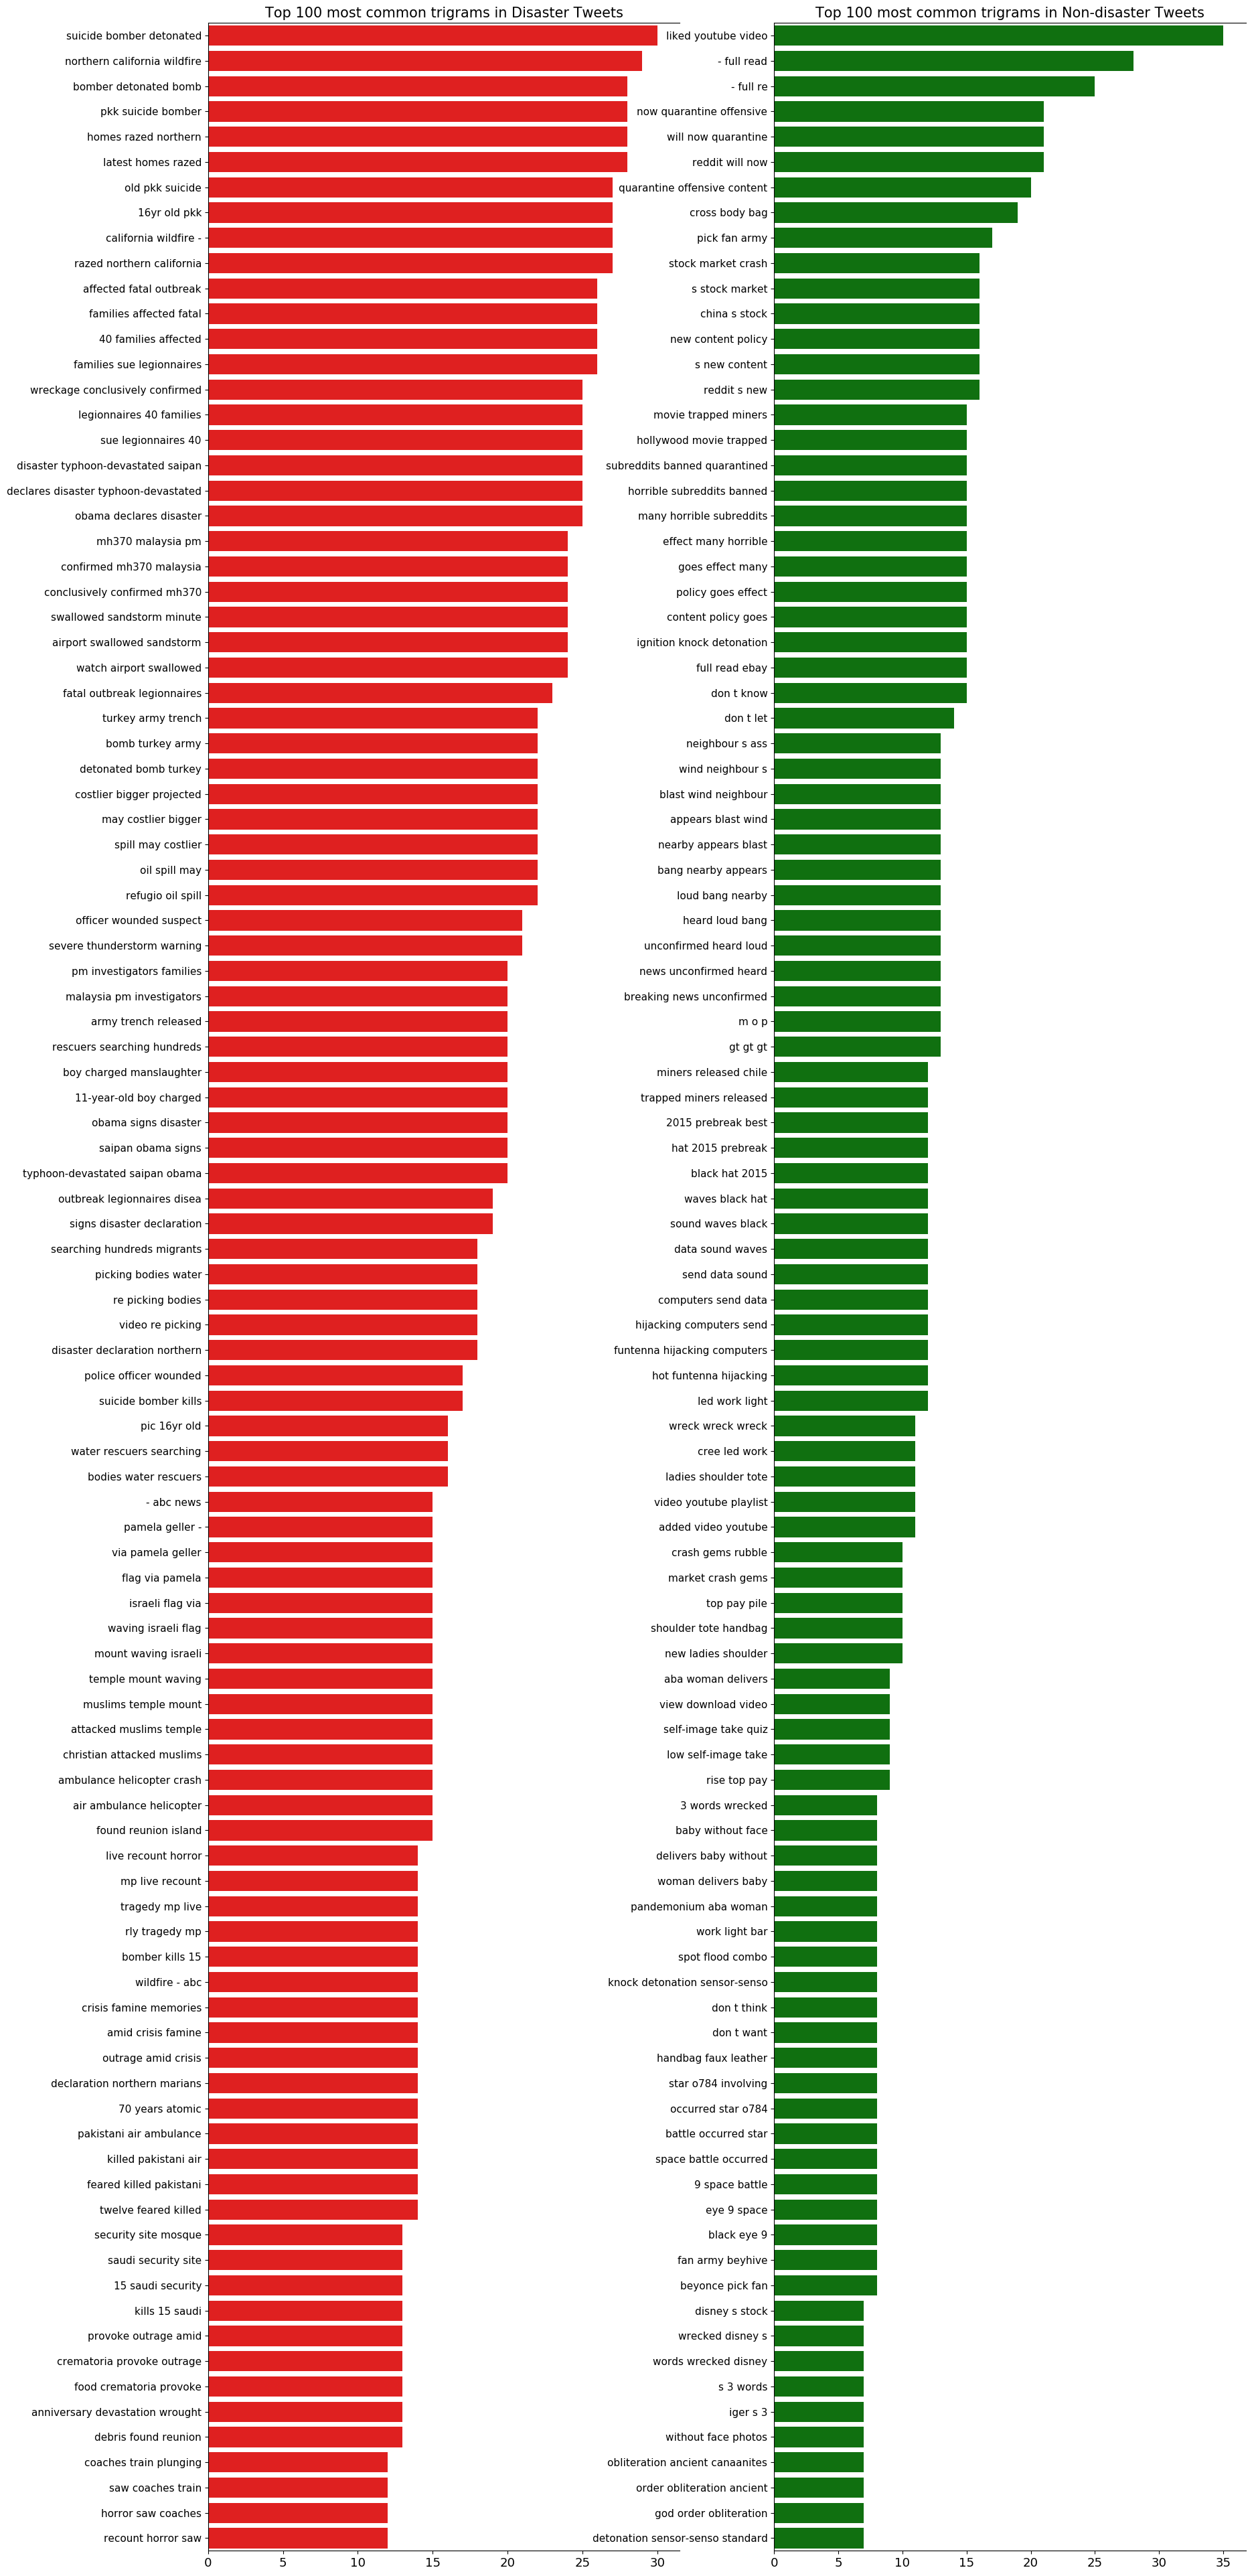

In [37]:
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1
        
for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1
        
df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=2, figsize=(20, 50), dpi=100)

sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=11)

axes[0].set_title(f'Top {N} most common trigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Non-disaster Tweets', fontsize=15)

plt.show()

# References.

1. https://github.com/nltk/nltk/wiki/Frequently-Asked-Questions-(Stackoverflow-Edition)

2. https://en.wikipedia.org/wiki/N-gram

3. https://www.kaggle.com/c/nlp-getting-started/data